<a href="https://colab.research.google.com/github/Mcdum22/MADT8101-Nicha/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Churn Prediction**

Customer Churn prediction involves the ability to anticipate which customers are inclined to discontinue or opt out of your service. This predictive capability holds significant relevance for numerous companies, owing to the fact that acquiring fresh customers frequently entails higher costs in comparison to retaining the ones already in the fold. Upon successfully identifying customers who are at risk of churning, the subsequent imperative lies in determining the precise marketing strategies that should be tailored for each individual customer, aimed at optimizing the chances of them remaining loyal to your service.

Customer churn is vital because acquiring new customers is more costly than selling to existing ones, and it's the metric that decides business success. Successful customer retention boosts the average lifetime value of customers, increasing the value of future sales and enhancing unit margins.



# **Churn Prediction for NGOs**



*   **Resource Optimization**: NGOs often rely on donations and support. Churn prediction helps identify potential donors who might disengage, allowing NGOs to target efforts towards retaining them and optimizing resource allocation.


*   **Sustained Engagement**: Predicting supporter churn enables NGOs to proactively engage with individuals showing signs of disengagement. By addressing concerns and nurturing relationships, NGOs can foster longer-term commitment to their causes. NGOs can also implement churn prediction to predict the HIV positive client that is likely to stop the ARV treatment.



# **Algorithms for Churn Prediction Models**

### **Decision Tree**

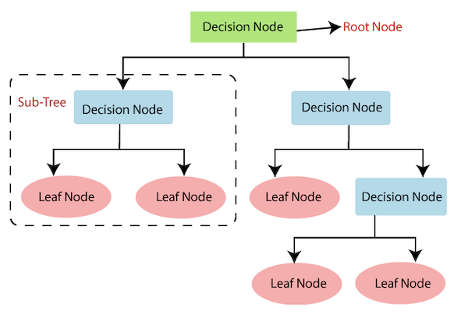

### **Random Forest**

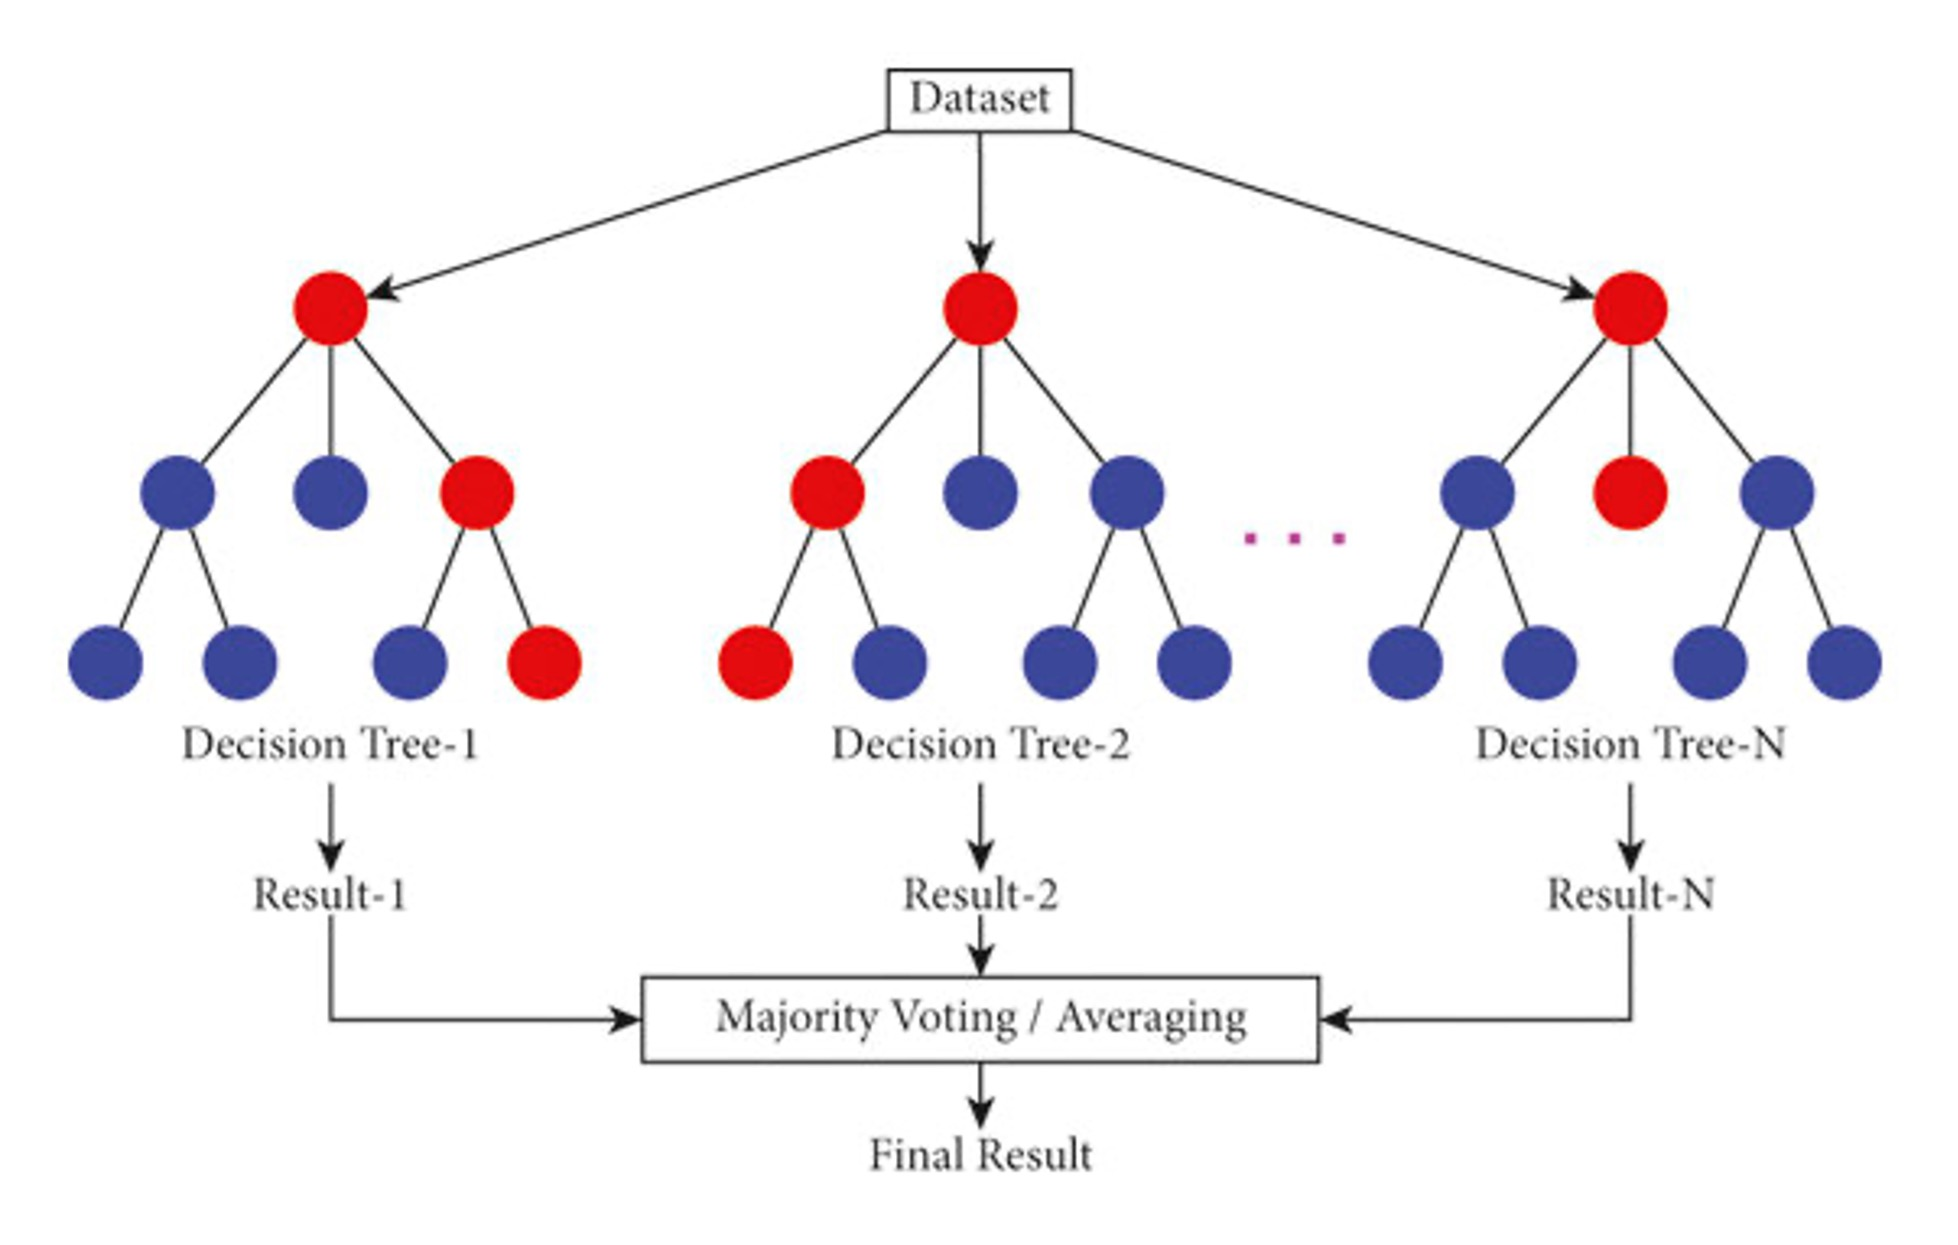

### **Support Vector Machine**
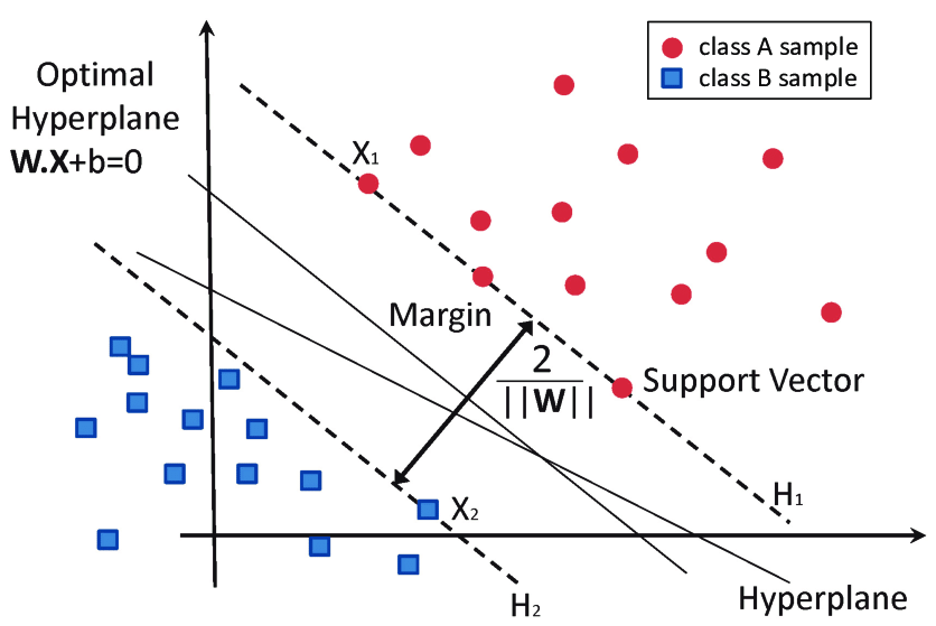

# **WORKSHOP**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(color_codes=True)

df = pd.read_csv('/content/Bank Customer Churn Prediction.csv')
print(df.head())

   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  


# **Exploratory Data Analysis**

In [ ]:
df.isnull().head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [ ]:
#Checking Data types
df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

0    7963
1    2037
Name: churn, dtype: int64


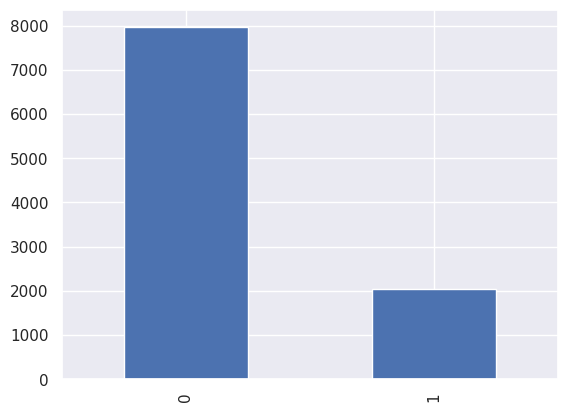

In [ ]:
#Counting 1 and 0 Value in Churn column
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["churn"].map(lambda x: color_wheel.get(x + 1))
print(df.churn.value_counts())
p=df.churn.value_counts().plot(kind="bar")

In [ ]:
#Change value in country column
df['country'] = df['country'].replace(['Germany'],'0')
df['country'] = df['country'].replace(['France'],'1')
df['country'] = df['country'].replace(['Spain'],'2')
#Change value in gender column
df['gender'] = df['gender'].replace(['Female'],'0')
df['gender'] = df['gender'].replace(['Male'],'1')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#convert object data types column to integer
df['country'] = pd.to_numeric(df['country'])
df['gender'] = pd.to_numeric(df['gender'])
df.dtypes

customer_id           int64
credit_score          int64
country               int64
gender                int64
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [ ]:
#Remove customer_id column
df2 = df.drop('customer_id', axis=1)
df2.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


<Axes: >

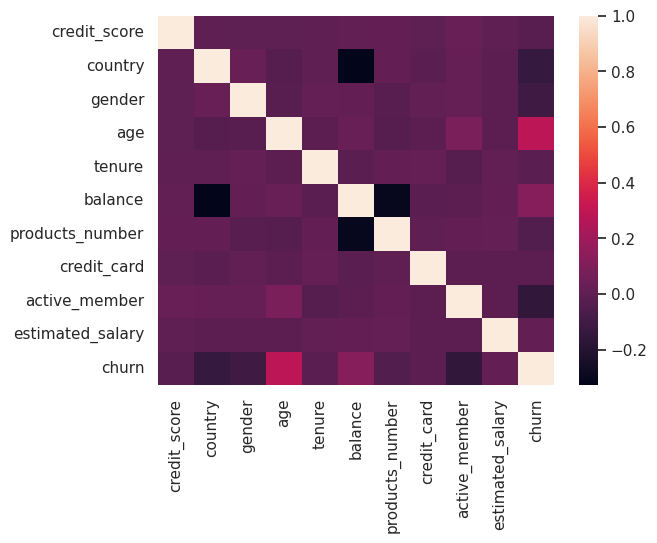

In [ ]:
sns.heatmap(df2.corr(), fmt='.2g')

# **Build Machine Learning Model**

In [ ]:
X = df2.drop('churn', axis=1)
y = df2['churn']
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=7)

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 78.64999999999999 %


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 86.25 %


# **Support Vector Machine**

In [ ]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 79.45 %


# **XGBoost**

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 85.9 %


# Visualize Random Forest and XGBoost Algorithm because Random Forest and XGBoost Algorithm have the Best Accuracy

In [ ]:
#importing classification report and confusion matrix from sklearn

from sklearn.metrics import classification_report, confusion_matrix

# **Random Forest**

In [ ]:
y_pred = rfc.predict(X_test)
print("Classification report - n", classification_report(y_test,y_pred))

Classification report - n               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1589
           1       0.77      0.47      0.58       411

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



Text(0.5, 1.0, 'Accuracy Score: 0.8625')

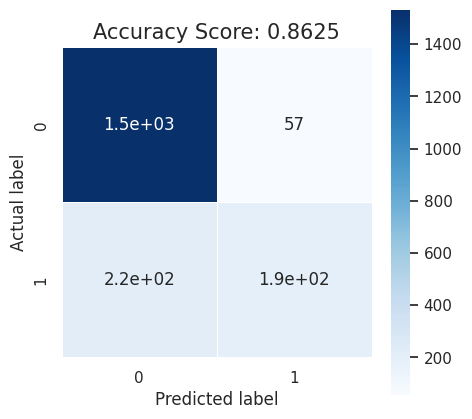

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

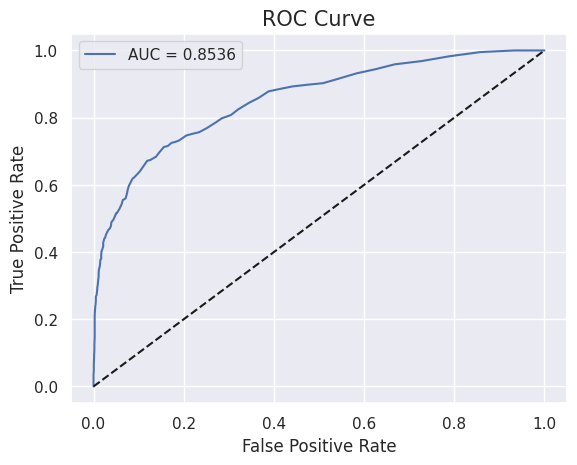

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# **XGBoost**

In [ ]:
y_pred = xgb_model.predict(X_test)
print("Classification report - n", classification_report(y_test,y_pred))

Classification report - n               precision    recall  f1-score   support

           0       0.88      0.95      0.91      1589
           1       0.73      0.50      0.59       411

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



Text(0.5, 1.0, 'Accuracy Score: 0.859')

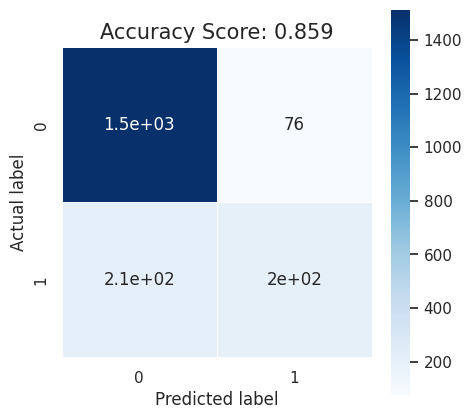

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(xgb_model.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

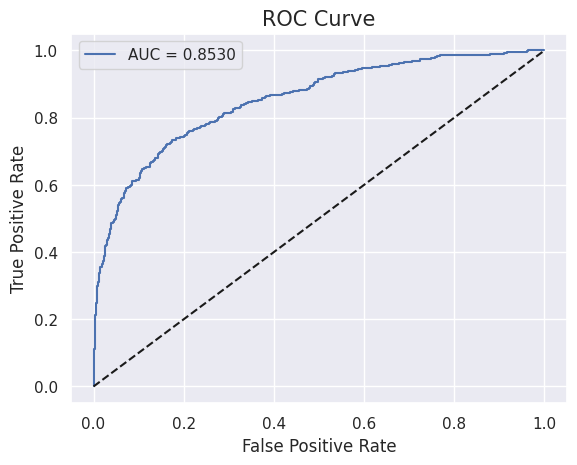

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = xgb_model.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()